In [9]:
# Import Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

# File to Load
file_to_load = "cleaned_2011.csv"

# Read CSV File and store into Pandas data frame
df= pd.read_csv(file_to_load, low_memory=False)

In [10]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,emp__8 years,emp__9 years,emp__< 1 year,ho__MORTGAGE,ho__OTHER,ho__OWN,ho__RENT,ver__Not Verified,ver__Source Verified,ver__Verified
0,5000,5000,4975.0,10.65,162.87,24000.0,Fully Paid,27.65,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2500,2500,2500.0,15.27,59.83,30000.0,Charged Off,1.00,0,5,...,0,0,1,0,0,0,1,0,1,0
2,2400,2400,2400.0,15.96,84.33,12252.0,Fully Paid,8.72,0,2,...,0,0,0,0,0,0,1,1,0,0
3,10000,10000,10000.0,13.49,339.31,49200.0,Fully Paid,20.00,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3000,3000,3000.0,12.69,67.79,80000.0,Current,17.94,0,0,...,0,0,0,0,0,0,1,0,1,0


In [11]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

In [12]:
# good loan =1, bad loan=0
df=df.replace(to_replace="Fully Paid",value= "1")
df=df.replace(to_replace="Charged Off",value= "0")
df=df.replace(to_replace="Current", value = "1")
df=df.replace(to_replace="Default",value= "0")
df=df.replace(to_replace="Late (31-120 days)",value= "0")
df=df.replace(to_replace="In Grace Period",value= "0")
df=df.replace(to_replace="Late (16-30 days)",value= "0")

In [13]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,emp__8 years,emp__9 years,emp__< 1 year,ho__MORTGAGE,ho__OTHER,ho__OWN,ho__RENT,ver__Not Verified,ver__Source Verified,ver__Verified
0,5000,5000,4975.0,10.65,162.87,24000.0,1,27.65,0,1,...,0,0,0,0,0,0,1,0,0,1
1,2500,2500,2500.0,15.27,59.83,30000.0,0,1.00,0,5,...,0,0,1,0,0,0,1,0,1,0
2,2400,2400,2400.0,15.96,84.33,12252.0,1,8.72,0,2,...,0,0,0,0,0,0,1,1,0,0
3,10000,10000,10000.0,13.49,339.31,49200.0,1,20.00,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3000,3000,3000.0,12.69,67.79,80000.0,1,17.94,0,0,...,0,0,0,0,0,0,1,0,1,0


df.to_csv("loan_2011_status.csv")

 df.groupby('loan_status').nunique()

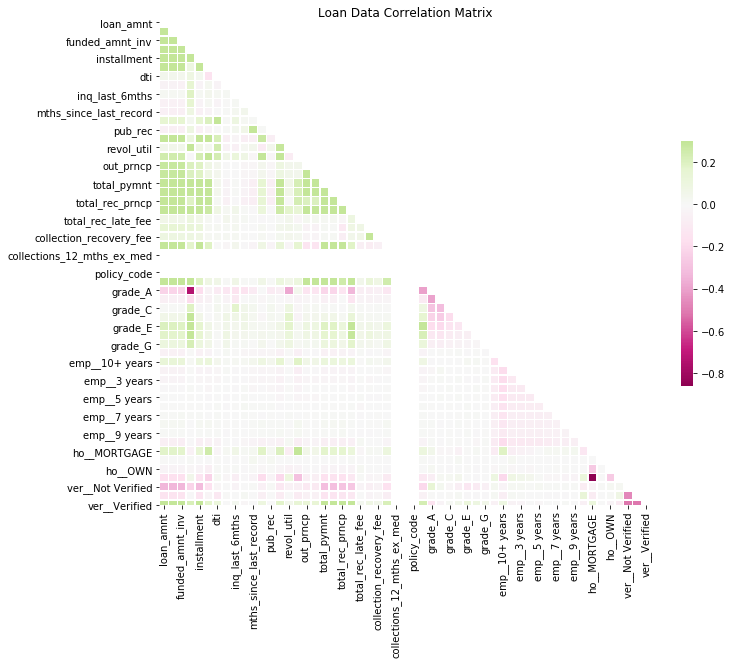

In [14]:
# Create data frame correlation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap='PiYG'

# Labels
ax.set_title('Loan Data Correlation Matrix')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, 
    mask=mask, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
).get_figure().savefig('correlation_matrix.png') # Save to a file

plt.show()

g = sns.catplot(x="loan_amnt", y= 'loan_status'.count, hue="loan_status", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Loan Amount")
g.set_ylabels("Loan Count")

In [17]:
from pycaret.datasets import get_data
data = get_data('cleaned_2011.csv')

ModuleNotFoundError: No module named 'pycaret'